In [1]:
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm
import IPython
import imageio
import os
import multiprocess as mp
from scipy.optimize import curve_fit

import os,sys,inspect
current_dir = os.path.dirname(os.path.abspath(inspect.getfile(inspect.currentframe())))
parent_dir = os.path.dirname(current_dir)
sys.path.insert(0, parent_dir) 

import algorithms as a
import force_functions as f

In [2]:
t_max = 100
dt = .01
lam = 0.1931833275037836
N = 11

In [3]:
def init(N, L):
    r0 = np.zeros([N, 3])
    for i in range(N):
        r0[i] = np.array([i+1, 0, 0])
    
    p0 = np.zeros([N, 3])
    central_idx = -(-N//2)
    p0[central_idx] = np.array([-3/7., 6/7., -2/7.])
    
    return r0, p0

In [32]:
r0, p0 = init(N=11, L=11)

In [33]:
r, p, t = a.BABAB_Ndim(r0, p0, t_max, dt, f.chain_force, lam, 
                       thermal_noise=False, periodic={'PBC': True, 'box_size': 11, 'force': False})

100%|██████████| 9999/9999 [00:01<00:00, 5813.25it/s]


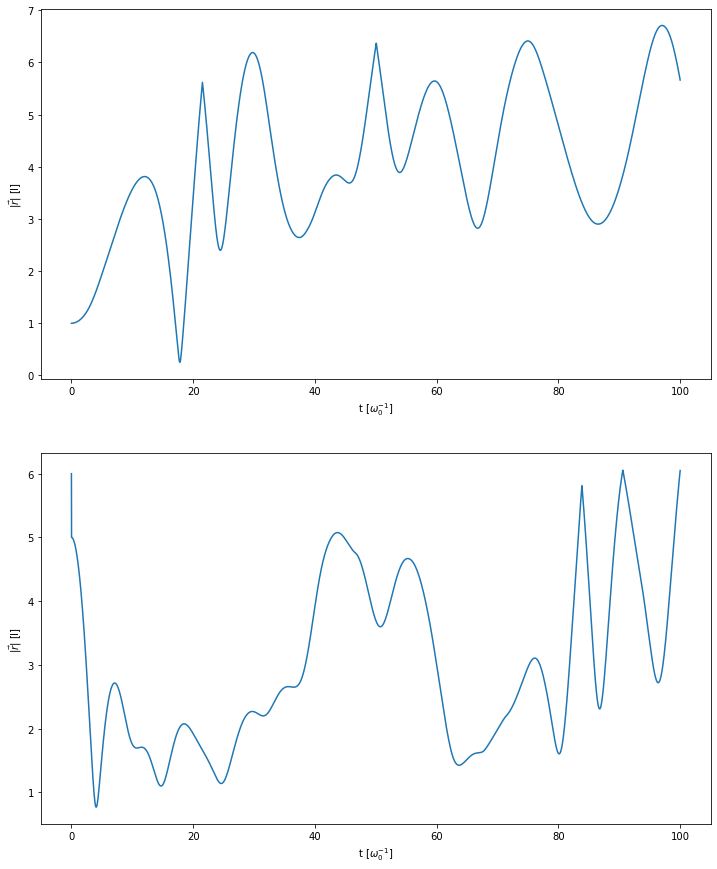

In [50]:
fig1, axes1 = plt.subplots(ncols=1, nrows=2, figsize=(12,16))
axes1[0].plot(t, np.linalg.norm(r[:,0,:], axis=1))
axes1[0].set_xlabel(r't $[\omega_0^{-1}]$')
axes1[0].set_ylabel(r'$|\vec{r}|$ [l]')

axes1[1].plot(t, np.linalg.norm(r[:,5,:], axis=1))
axes1[1].set_xlabel(r't $[\omega_0^{-1}]$')
axes1[1].set_ylabel(r'$|\vec{r}|$ [l]')
plt.show()

In [44]:
r0, p0 = init(N=11, L=11)

In [47]:
r_cl, p_cl, t_cl = a.BABAB_Ndim(r0, p0, t_max, dt, f.chain_force, lam, 
                                thermal_noise=False, periodic={'PBC': True, 'box_size': 11, 'force': True})

100%|██████████| 9999/9999 [00:01<00:00, 5635.61it/s]


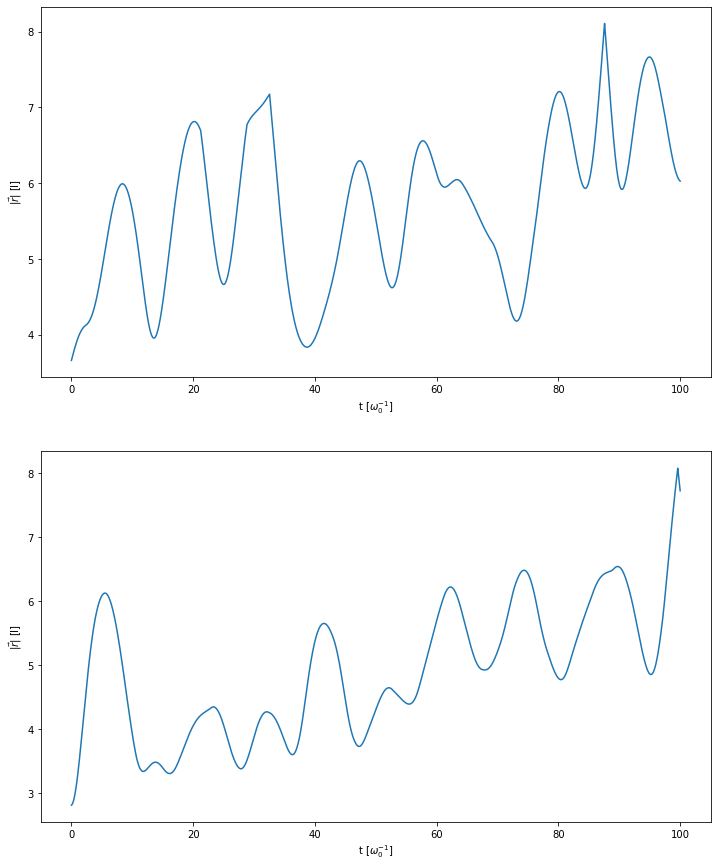

In [51]:
fig2, axes2 = plt.subplots(ncols=1, nrows=2, figsize=(12,16))
axes2[0].plot(t_cl, np.linalg.norm(r_cl[:,0,:], axis=1))
axes2[0].set_xlabel(r't $[\omega_0^{-1}]$')
axes2[0].set_ylabel(r'$|\vec{r}|$ [l]')

axes2[1].plot(t_cl, np.linalg.norm(r_cl[:,5,:], axis=1))
axes2[1].set_xlabel(r't $[\omega_0^{-1}]$')
axes2[1].set_ylabel(r'$|\vec{r}|$ [l]')
plt.show()

In [53]:
m = np.ones([N, 1])

In [72]:
def centre_of_mass(r, m):
    M = m.sum()
    r_cm = np.zeros([r.shape[0], r.shape[2]])
    for i, r_i in enumerate(r):
        r_cm[i] = (m*r_i).sum(axis=0) / M
        
    return r_cm

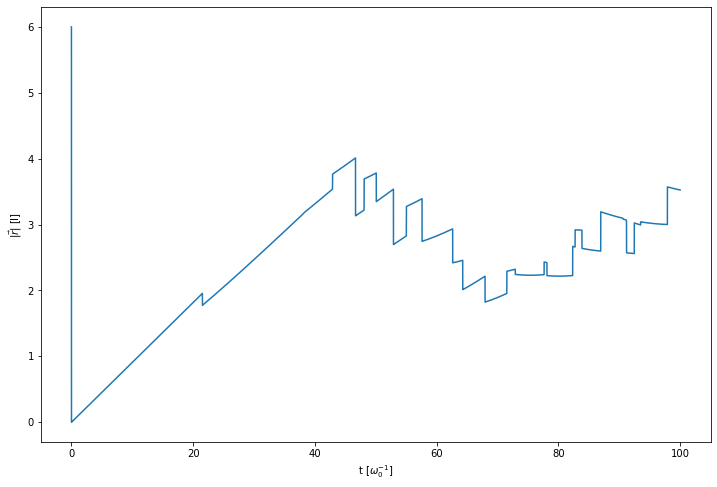

In [73]:
fig3, axes3 = plt.subplots(ncols=1, nrows=1, figsize=(12,8))
axes3.plot(t, np.linalg.norm(centre_of_mass(r, m), axis=1))
axes3.set_xlabel(r't $[\omega_0^{-1}]$')
axes3.set_ylabel(r'$|\vec{r}|$ [l]')
plt.show()